<a href="https://colab.research.google.com/github/profshai/neural-networks-deep-learning/blob/main/cnn_image_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network - Image Identification

We want to build a model that will identify whether an image is a 'cat' or a 'dog'.

### Importing the libraries

In [10]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [11]:
tf.__version__

'2.5.0'

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
cd 'drive/MyDrive'

/content/drive/MyDrive


In [19]:
cd 'Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [21]:
cd 'Deep-Learning'

/content/drive/My Drive/Colab Notebooks/Deep-Learning


In [22]:
cd 'dataset'

/content/drive/My Drive/Colab Notebooks/Deep-Learning/dataset


## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [25]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8329 images belonging to 2 classes.


### Preprocessing the Test set

In [26]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [27]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [29]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [31]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [32]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [33]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [34]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [35]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
261/261 [==============================] - 4631s 18s/step - loss: 0.6549 - accuracy: 0.6097 - val_loss: 0.5987 - val_accuracy: 0.6775
Epoch 2/25
261/261 [==============================] - 60s 230ms/step - loss: 0.5753 - accuracy: 0.7007 - val_loss: 0.5443 - val_accuracy: 0.7260
Epoch 3/25
261/261 [==============================] - 60s 229ms/step - loss: 0.5440 - accuracy: 0.7279 - val_loss: 0.5244 - val_accuracy: 0.7470
Epoch 4/25
261/261 [==============================] - 60s 231ms/step - loss: 0.5101 - accuracy: 0.7485 - val_loss: 0.5617 - val_accuracy: 0.7190
Epoch 5/25
261/261 [==============================] - 60s 228ms/step - loss: 0.4900 - accuracy: 0.7571 - val_loss: 0.4855 - val_accuracy: 0.7700
Epoch 6/25
261/261 [==============================] - 60s 229ms/step - loss: 0.4662 - accuracy: 0.7744 - val_loss: 0.4691 - val_accuracy: 0.7840
Epoch 7/25
261/261 [==============================] - 60s 228ms/step - loss: 0.4546 - accuracy: 0.7877 - val_loss: 0.5074 - val_ac

## Part 4 - Making a single prediction

In [41]:
# I downloaded a picture of a dog online to test the model.
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('single_prediction/dog_or_cat.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [42]:
print(prediction)

dog


This is a correct prediction. The image of the dog is below:

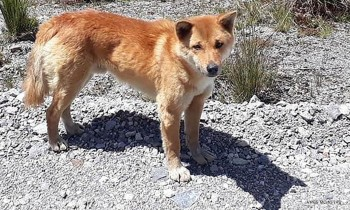